In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.font_manager as fm
import matplotlib as mpl
import os
%config InlineBackend.figure_format = 'svg'
# 检查系统是否安装了 Arial 字体
def is_arial_available():
    for font in fm.fontManager.ttflist:
        if 'Arial' in font.name:
            return True
    return False

# 如果系统没有 Arial 字体，加载用户自定义字体
if not is_arial_available():
    user_font_path = os.path.expanduser('~/.local/share/fonts/ARIAL.TTF')
    if os.path.exists(user_font_path):
        # 添加用户字体到 Matplotlib 的字体管理器
        fm.fontManager.addfont(user_font_path)
        # 设置 Matplotlib 使用该字体
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']
        print("已加载用户自定义 Arial 字体")
    else:
        print("未找到用户自定义 Arial 字体文件")
else:
    print("系统已安装 Arial 字体")

# 重置 Matplotlib 的全局设置
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['font.family'] = ['Arial']  # 设置字体为 Arial
plt.rcParams['font.size'] = 24  # 设置全局字体大小
    


系统已安装 Arial 字体


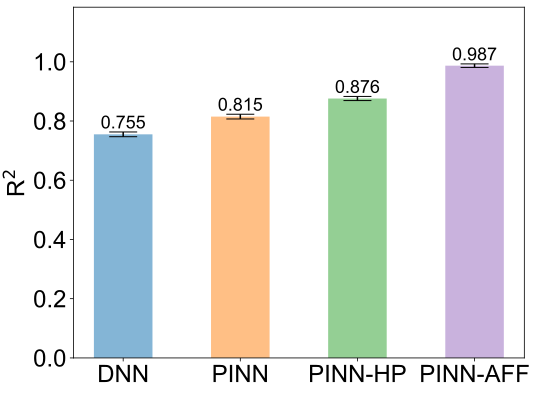

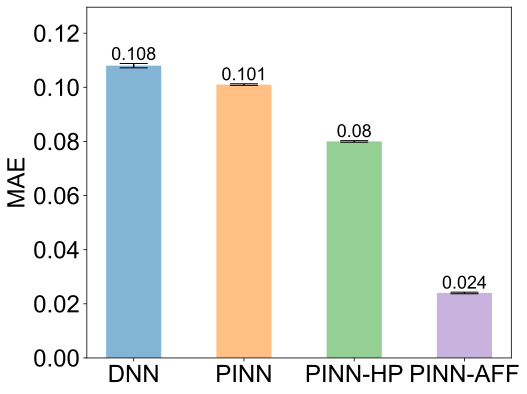

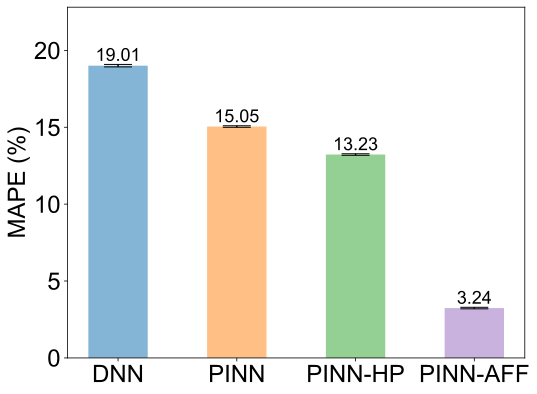

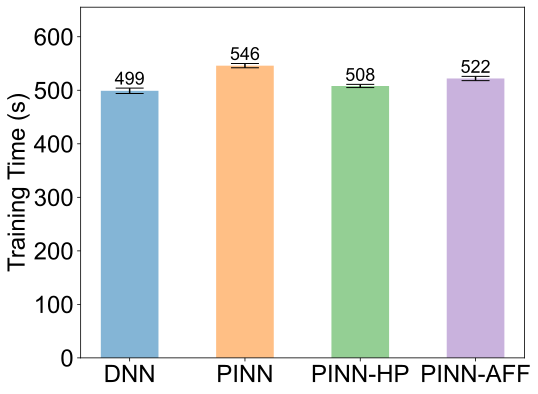

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# 示例数据
metrics = [f'R$^{2}$', 'MAE', 'MAPE (%)', 'Training Time (s)']
dnn_values = [0.755, 0.108, 19.01, 499]  # DNN 值
pinn_values = [0.815, 0.101, 15.05, 546]  # PINN 值
pinn_hp_values = [0.876, 0.080, 13.23, 508]  # PINN-HP 值
pinn_aff_values = [0.987, 0.024, 3.24, 522]  # PINN-AFF 值

# 误差棒（请根据实际情况替换）
dnn_errors = [0.008, 0.0008, 0.08, 5]  # DNN 误差
pinn_errors = [0.008, 0.0003, 0.05, 4]  # PINN 误差
pinn_hp_errors = [0.007, 0.0003, 0.05, 3]  # PINN-HP 误差
pinn_aff_errors = [0.006, 0.0003, 0.05, 4]  # PINN-AFF 误差

# 颜色设置
dnn_color = 'tab:blue'  # 蓝色
pinn_color = 'tab:orange'  # 橙色
pinn_hp_color = 'tab:green'  # 绿色
pinn_aff_color = 'tab:purple'  # 紫色

# 创建渐变颜色映射
def create_gradient_cmap(color1, color2, gamma=2.0, N=256):
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [color1, color2], N=N)
    cmap._init()
    cmap._lut[:, -1] = np.linspace(0, 1, cmap.N + 3) ** gamma
    return cmap

# 绘制柱状图
def plot_bar(ax, x, value, error, color, label):
    bar = ax.bar(x, value, width=0.1, color=color, yerr=error, capsize=14, label=label)
    for rect in bar:
        height = rect.get_height()
        # 标签的 y 坐标 = 柱子高度 + 误差棒高度
        label_y = height + error  # 使用当前指标的误差值
        if metric == 'Training Time':
            ax.text(rect.get_x() + rect.get_width() / 2.0, label_y, f'{height}', ha='center', va='bottom', fontsize=18)
        else:
            ax.text(rect.get_x() + rect.get_width() / 2.0, label_y, f'{height}', ha='center', va='bottom', fontsize=18)

# 绘图
for i, metric in enumerate(metrics):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=600)
    x = [1, 1.2, 1.4, 1.6]  # 柱状图位置：DNN, PINN, PINN-HP, PINN-AFF
    
    # 创建渐变颜色
    dnn_cmap = create_gradient_cmap('lightblue', dnn_color)
    pinn_cmap = create_gradient_cmap('white', pinn_color)
    pinn_hp_cmap = create_gradient_cmap('white', pinn_hp_color)
    pinn_aff_cmap = create_gradient_cmap('white', pinn_aff_color)
    
    # 绘制柱状图
    plot_bar(ax, x[0], dnn_values[i], dnn_errors[i], dnn_cmap(0.8), 'DNN')
    plot_bar(ax, x[1], pinn_values[i], pinn_errors[i], pinn_cmap(0.8), 'PINN')
    plot_bar(ax, x[2], pinn_hp_values[i], pinn_hp_errors[i], pinn_hp_cmap(0.8), 'PINN-HP')
    plot_bar(ax, x[3], pinn_aff_values[i], pinn_aff_errors[i], pinn_aff_cmap(0.8), 'PINN-AFF')
    
    # 设置坐标轴
    ax.set_xticks(x)
    ax.set_xticklabels(['DNN', 'PINN', 'PINN-HP', 'PINN-AFF'])
    ax.set_ylabel(metric + (' [s]' if metric == 'Training Time' else ''))
    ax.set_ylim(0, max(dnn_values[i], pinn_values[i], pinn_hp_values[i], pinn_aff_values[i]) * 1.2)
    
    plt.tight_layout()
    plt.show()

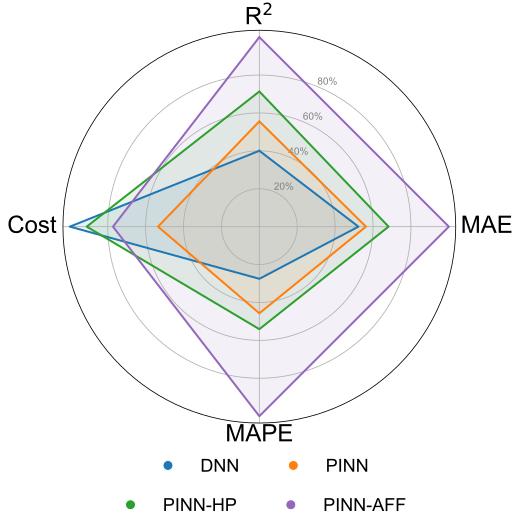

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# =============== 数据预处理 ===============
metrics = ['R$^2$', 'MAE', 'MAPE', 'Cost']
models = {
    'DNN': [0.755, 0.108, 19.01, 499],
    'PINN': [0.815, 0.101, 15.05, 546],
    'PINN-HP': [0.876, 0.080, 13.23, 508],
    'PINN-AFF': [0.987, 0.024, 3.24, 522],
    'baseline1': [0.6,0.2,25,600]
}

# 标准化处理（R²和训练时间正向指标，MAE/MAPE负向指标）
def normalize(data, reverse=False):
    min_val = min(data)
    max_val = max(data)
    scaled = [(x - min_val)/(max_val - min_val) for x in data]
    return [1-x for x in scaled] if reverse else scaled

# 处理各指标
r2 = normalize([v[0] for v in models.values()])  # 正向指标
mae = normalize([v[1] for v in models.values()], reverse=True)  # 负向指标反向处理
mape = normalize([v[2] for v in models.values()], reverse=True)
train_time = normalize([v[3] for v in models.values()],reverse=True)  # 负向指标

# =============== 雷达图绘制 ===============
# 角度计算（闭合处理）
num_vars = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 闭合多边形

# 创建画布
plt.figure(figsize=(8, 8), dpi=600,facecolor='none')
ax = plt.subplot(111, polar=True)
ax.patch.set_alpha(0) # 设置子图背景透明
# 颜色配置（参考网页1的配色方案）
colors = {
    'DNN': '#1f77b4',
    'PINN': '#ff7f0e',
    'PINN-HP': '#2ca02c',
    'PINN-AFF': '#9467bd'
}


# 绘制每个模型
for model, color in colors.items():
    values = []
    if model == 'DNN': values = [r2[0], mae[0], mape[0], train_time[0]]
    elif model == 'PINN': values = [r2[1], mae[1], mape[1], train_time[1]]
    elif model == 'PINN-HP': values = [r2[2], mae[2], mape[2], train_time[2]]
    elif model == 'PINN-AFF': values = [r2[3], mae[3], mape[3], train_time[3]]
    
    # 数据闭合处理（参考网页3）
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, label=model)
    ax.fill(angles, values, color=color, alpha=0.1)

# =============== 坐标轴设置 ===============
# 标签设置（参考网页5）
ax.set_theta_offset(np.pi/2)  # 起始角度在顶部
ax.set_theta_direction(-1)   # 顺时针方向
ax.set_xticks(angles[:-1])

# 调整标签位置，避免与雷达图外围线交叉
label_positions = {
    'R$^2$': [0, 1.1],
    'MAE': [np.pi/2, 1.2],  # 向外移动MAE标签
    'MAPE': [np.pi, 1.1],
    'Cost': [3*np.pi/2, 1.2]  # 向外移动Cost标签
}

for label, (angle, distance) in zip(metrics, label_positions.values()):
    ax.text(angle, distance, label, 
            ha='center', va='center', 
            fontsize=24)

# 隐藏默认标签
ax.set_xticklabels([])

# 径向网格线（参考网页10）
ax.set_rgrids([0.2, 0.4, 0.6, 0.8], 
              labels=['20%', '40%', '60%', '80%'],
              fontsize=10,
              color='grey')

# =============== 图例与标题 ===============
# 使用自定义图例，放在图表下方，分两行显示
legend_elements = []
models_list = list(colors.keys())
half = len(models_list) // 2

# 创建图例元素，使用实心点
for model, color in colors.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor=color, markersize=10, label=model))

# 分两行放置图例
first_row = ax.legend(handles=legend_elements[:half], loc='upper center', 
                     bbox_to_anchor=(0.5, -0.05), ncol=half, frameon=False, fontsize=18)
ax.add_artist(first_row)
ax.legend(handles=legend_elements[half:], loc='upper center', 
         bbox_to_anchor=(0.5, -0.15), ncol=len(models_list)-half, frameon=False, fontsize=18)

# =============== 输出图像 ===============
plt.tight_layout()
plt.savefig('radar_chart.pdf', bbox_inches='tight',transparent=True)  # 矢量格式输出（参考网页7）
plt.show()